In [1]:
#    This example shows how to perform edge detection using Sobel operator on color
#    images with the help of QFTPy's convolution.
#    
#    by z0gSh1u @ https://github.com/z0gSh1u/qftpy

In [2]:
import numpy as np
import quaternion
import matplotlib.pyplot as plt
from PIL import Image

from qftpy.io import im2q, q2im
from qftpy.conv import conv2
from qftpy.utils import unit, qzeros, ALL_ONE_AXIS

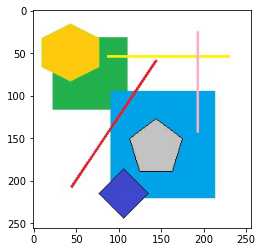

In [3]:
# This sample image is drawn by me for my course report in Southeast University, China.
img = Image.open('edge_phantom.jpg')
plt.figure()
plt.imshow(img)

In [4]:
# Convert it to quaternion matrix.
qImg = im2q(img)
qImg.dtype

dtype(quaternion)

In [5]:
# Calculate the transform axis and kernel of horizontal Sobel operator.
# Refer to "Colour image edge detector based on quaternion convolution" [Sangwine, 1998] for detail.
mu = unit(ALL_ONE_AXIS) # transform axis
R = np.exp(mu * np.pi / 4) / np.sqrt(8)
Sqrt2 = np.sqrt(2)

kHorLeft = np.array([
    [R, Sqrt2 * R, R],
    qzeros(3),
    np.conjugate([R, Sqrt2 * R, R]),
], dtype=np.quaternion) # Left kernel.
kHorRight = np.conjugate(kHorLeft) # Right kernel.

In [6]:
# Perform 2D quaternion convolution.
horEdges = conv2(qImg, kHorLeft, kHorRight)

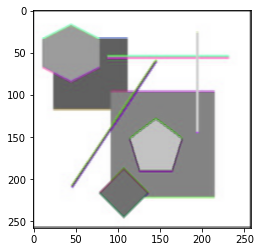

In [8]:
# Convert quaternion matrix to color image.
horImg = q2im(horEdges, PIL=True)
plt.figure()
plt.imshow(horImg)

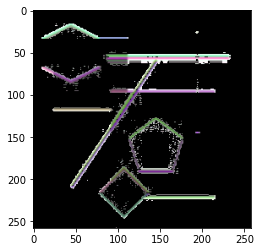

In [20]:
# Perform color thresholding to extract edges.
THRESHOLD = 8
horImgTh = np.array(horImg, dtype=np.float32) # uint8 to float to support subtraction
h, w, c = horImgTh.shape
for i in range(h):
    for j in range(w):
        pixel = horImgTh[i, j]
        # Set grayscale pixels to 0.
        if abs(pixel[0] - pixel[1]) < THRESHOLD and abs(pixel[1] - pixel[2]) < THRESHOLD and abs(pixel[2] - pixel[0]) < THRESHOLD:
            horImgTh[i, j, ...] = 0

plt.figure()
plt.imshow(Image.fromarray(horImgTh.astype(np.uint8)))

In [21]:
# The vertical Sobel kernel can be easily obtained by:
kVertLeft = kHorLeft.T
kVertRight = kHorRight.T
# Omit the vertical edge detection.